<a href="https://colab.research.google.com/github/msmsriram/BIGDATA_ANALYTICS_FACE_BOOK_DATA/blob/main/Copy_of_EDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq

Selecting previously unselected package libxtst6:amd64.
(Reading database ... 122352 files and directories currently installed.)
Preparing to unpack .../libxtst6_2%3a1.2.3-1_amd64.deb ...
Unpacking libxtst6:amd64 (2:1.2.3-1) ...
Selecting previously unselected package openjdk-8-jre-headless:amd64.
Preparing to unpack .../openjdk-8-jre-headless_8u362-ga-0ubuntu1~20.04.1_amd64.deb ...
Unpacking openjdk-8-jre-headless:amd64 (8u362-ga-0ubuntu1~20.04.1) ...
Selecting previously unselected package openjdk-8-jdk-headless:amd64.
Preparing to unpack .../openjdk-8-jdk-headless_8u362-ga-0ubuntu1~20.04.1_amd64.deb ...
Unpacking openjdk-8-jdk-headless:amd64 (8u362-ga-0ubuntu1~20.04.1) ...
Setting up libxtst6:amd64 (2:1.2.3-1) ...
Setting up openjdk-8-jre-headless:amd64 (8u362-ga-0ubuntu1~20.04.1) ...
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/orbd to provide /usr/bin/orbd (orbd) in auto mode
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/servertool to

In [ ]:
!pip install pyspark


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=bd47582467f44f2c1a9888aed13cf5c73426374ac15ff2779b718a0fcda490bb
  Stored in directory: /root/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("myApp").getOrCreate()


In [ ]:
from pyspark.sql import Row

data = [('Alice', 1), ('Bob', 2), ('Charlie', 3)]
rdd = spark.sparkContext.parallelize(data)
people = rdd.map(lambda x: Row(name=x[0], age=x[1]))
df = spark.createDataFrame(people)
df.show()


+-------+---+
|   name|age|
+-------+---+
|  Alice|  1|
|    Bob|  2|
|Charlie|  3|
+-------+---+



In [ ]:
!pip install findspark


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os

os.environ["JAVA_HOME"] = "C:\Program Files\Java\jdk1.8.0_361"
os.environ["SPARK_HOME"]= "C:\spark-3.3.2-bin-hadoop3"


In [ ]:
import findspark
findspark.init("C:\spark-3.3.2-bin-hadoop3")


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import matplotlib.pyplot as plt


In [ ]:
df = spark.read.csv('/content/gdrive/MyDrive/pseudo_facebook.csv', header=True, inferSchema=True)


In [ ]:
# Calculate the average age by gender
avg_age_gender = df.groupBy('gender').agg(F.avg('age').alias('avg_age'))

## Create a bar chart of the average age by gender


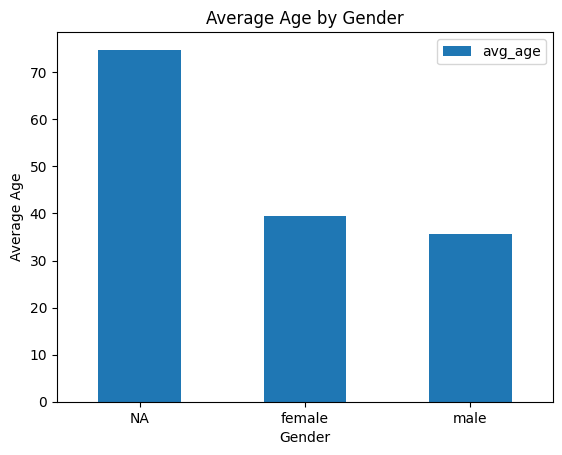

In [ ]:
avg_age_gender_pd = avg_age_gender.toPandas()
avg_age_gender_pd.plot(kind='bar', x='gender', y='avg_age', rot=0)
plt.title('Average Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.show()

## Create a bar chart of the average age by gender


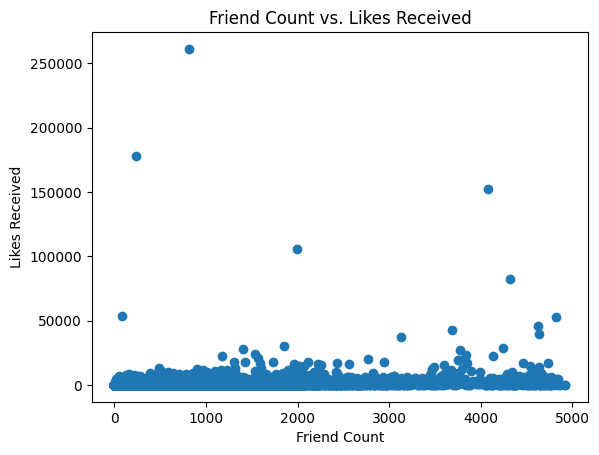

In [ ]:
friend_likes = df.select('friend_count', 'likes_received').toPandas()
plt.scatter(friend_likes['friend_count'], friend_likes['likes_received'])
plt.title('Friend Count vs. Likes Received')
plt.xlabel('Friend Count')
plt.ylabel('Likes Received')
plt.show()

In [ ]:
!pip install graphframes


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 7.6 MB/s eta 0:00:00


In [ ]:
from pyspark.sql import SparkSession
from graphframes import GraphFrame
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
df.show(5)

+-------+---+-------+--------+---------+------+------+------------+---------------------+-----+--------------+------------+---------------------+---------+------------------+
| userid|age|dob_day|dob_year|dob_month|gender|tenure|friend_count|friendships_initiated|likes|likes_received|mobile_likes|mobile_likes_received|www_likes|www_likes_received|
+-------+---+-------+--------+---------+------+------+------------+---------------------+-----+--------------+------------+---------------------+---------+------------------+
|2094382| 14|     19|    1999|       11|  male|   266|           0|                    0|    0|             0|           0|                    0|        0|                 0|
|1192601| 14|      2|    1999|       11|female|     6|           0|                    0|    0|             0|           0|                    0|        0|                 0|
|2083884| 14|     16|    1999|       11|  male|    13|           0|                    0|    0|             0|           0|  

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
G = nx.Graph()


In [ ]:
nodes = df.select('userid').distinct().collect()
for node in nodes:
    G.add_node(node['userid'])

In [ ]:
edges = df.select('userid', 'friend_count').collect()
for edge in edges:
    G.add_edge(edge['userid'], edge['friend_count'])

In [ ]:
# plt.figure(figsize=(10, 10))
# nx.draw(G, with_labels=True)
# plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

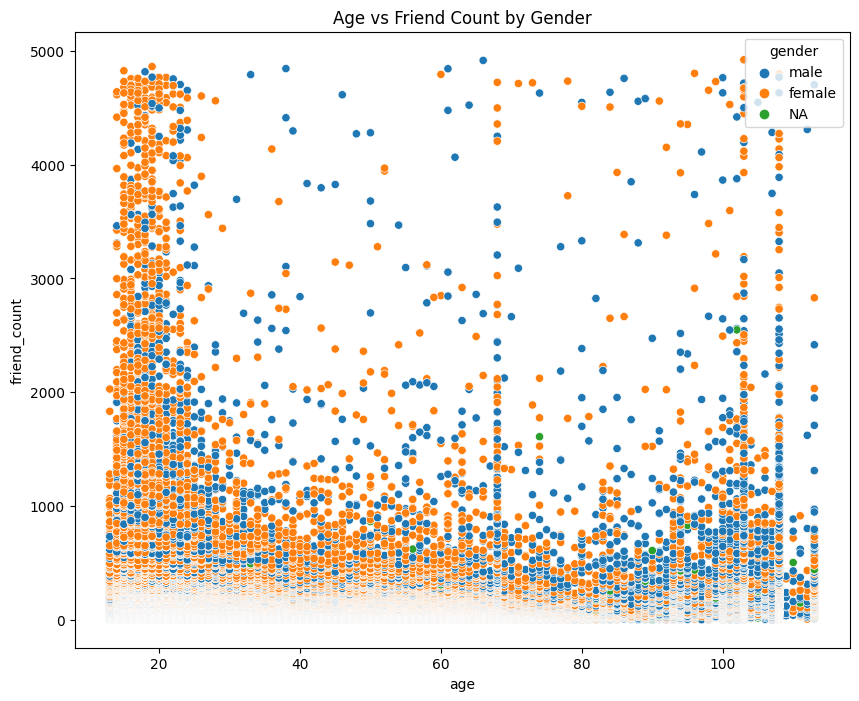

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x="age", y="friend_count", hue="gender", data=df.toPandas())
plt.title("Age vs Friend Count by Gender")
plt.show()


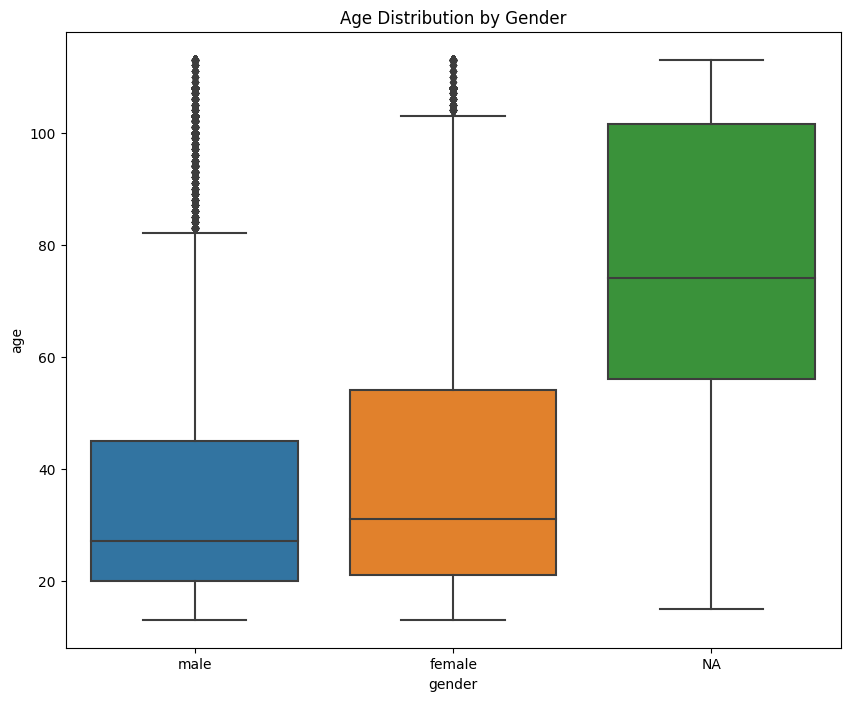

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="gender", y="age", data=df.toPandas())
plt.title("Age Distribution by Gender")
plt.show()


<ipython-input-34-432c33b3d45b>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = pandas_df[numerical_cols].corr()


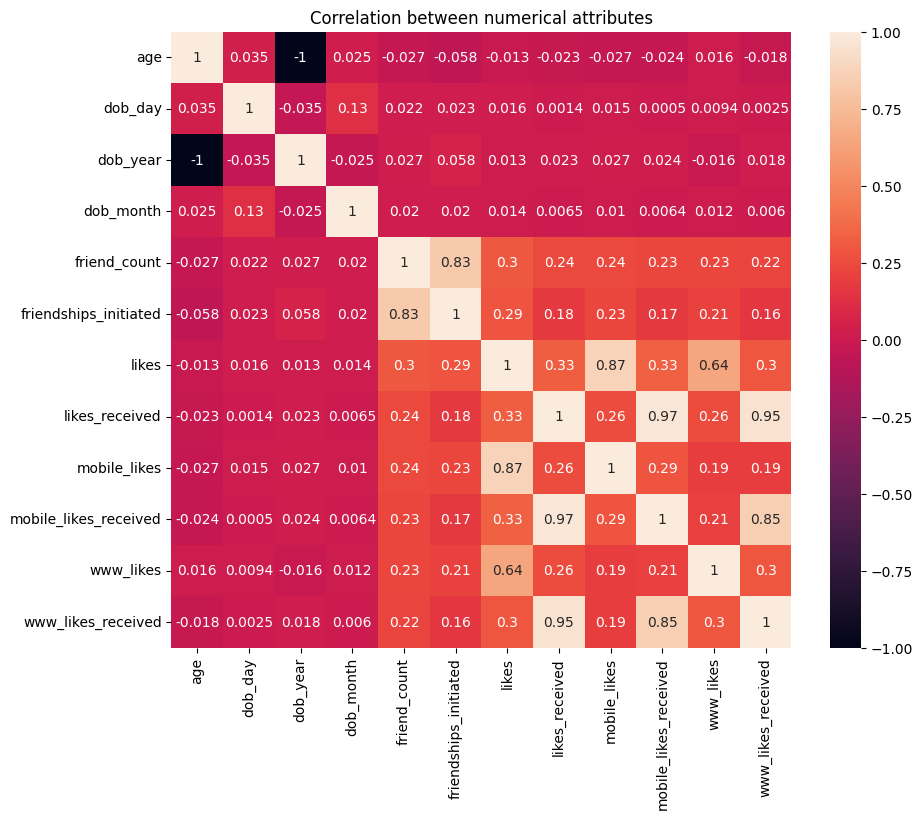

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas DataFrame
pandas_df = df.toPandas()

# Select the numerical columns
numerical_cols = ['age', 'dob_day', 'dob_year', 'dob_month', 'tenure', 'friend_count', 'friendships_initiated', 'likes', 'likes_received', 'mobile_likes', 'mobile_likes_received', 'www_likes', 'www_likes_received']

# Create a correlation matrix
corr_matrix = pandas_df[numerical_cols].corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation between numerical attributes")
plt.show()


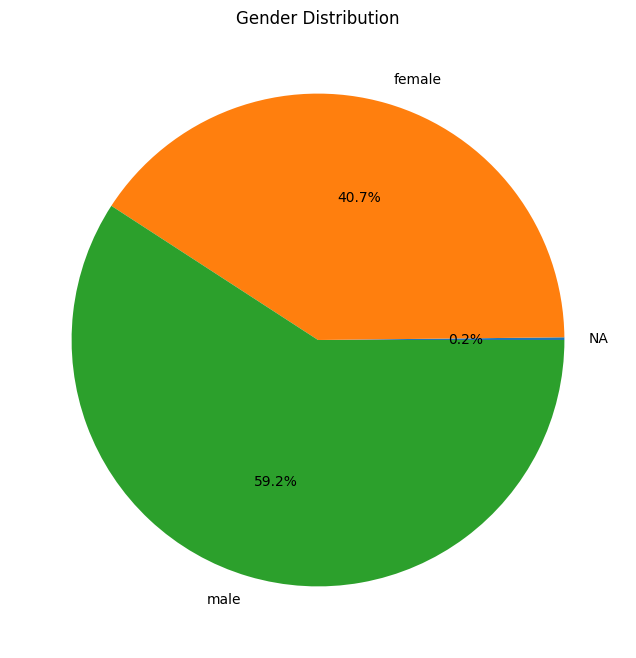

In [ ]:
from pyspark.sql.functions import count

gender_counts = df.groupBy('gender').agg(count('*').alias('count'))
plt.figure(figsize=(10, 8))
counts = gender_counts.select('count').rdd.flatMap(lambda x: x).collect()
labels = gender_counts.select('gender').rdd.flatMap(lambda x: x).collect()
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.show()



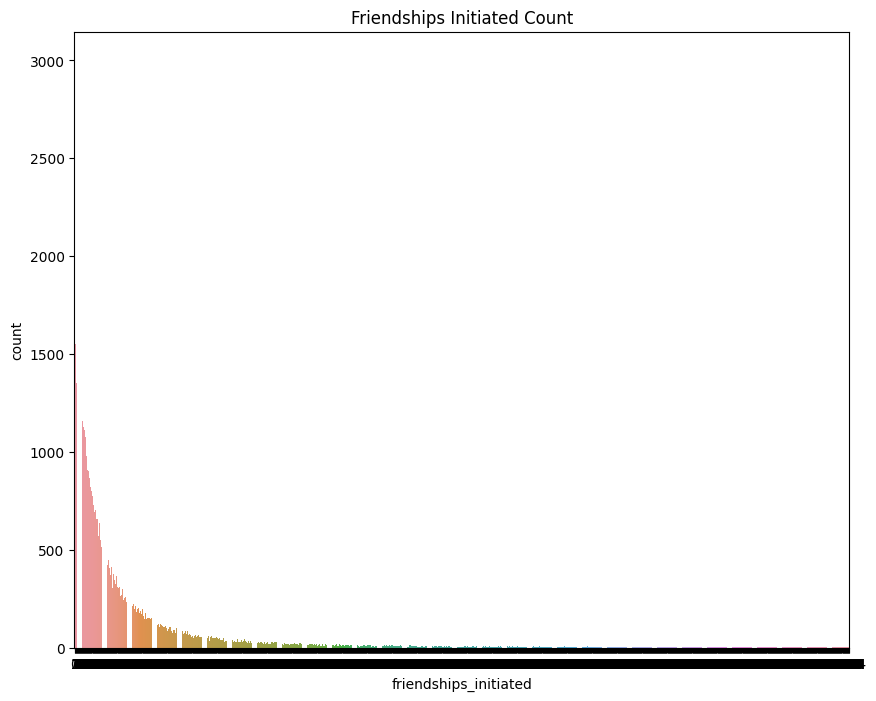

In [ ]:
friendship_initiated_counts = df.groupBy('friendships_initiated').agg(count('*').alias('count'))
plt.figure(figsize=(10, 8))
sns.barplot(x='friendships_initiated', y='count', data=friendship_initiated_counts.toPandas())
plt.title("Friendships Initiated Count")
plt.show()


<ipython-input-42-cdba80755d0c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.select(relevant_cols).toPandas().corr()


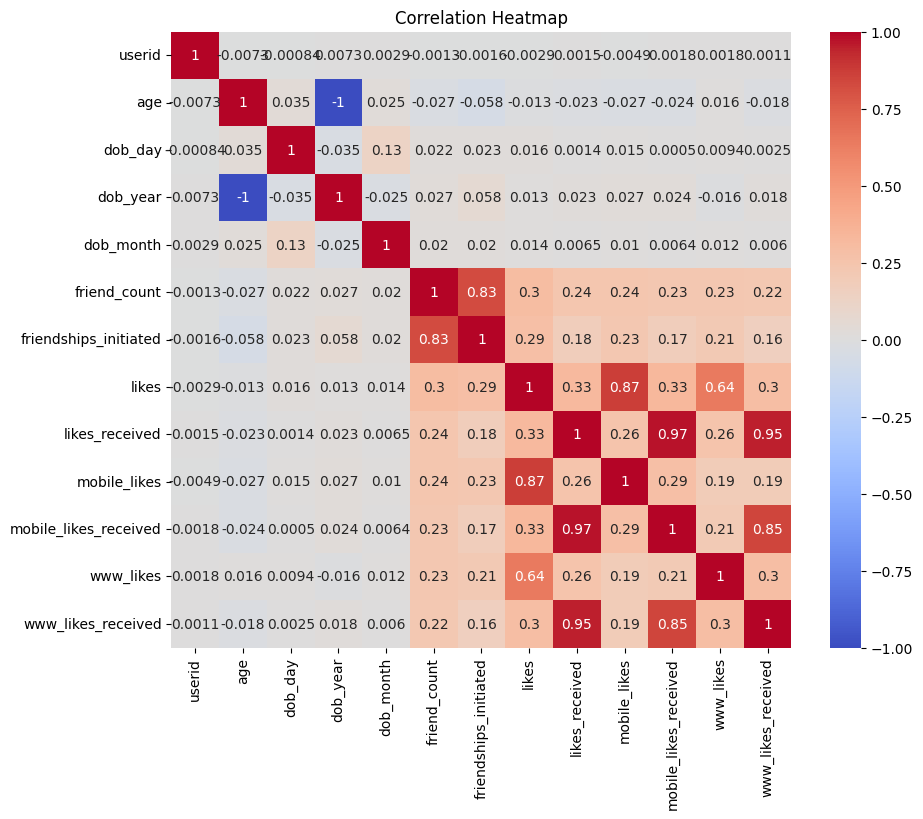

In [ ]:
relevant_cols = ['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure', 'friend_count', 'friendships_initiated', 'likes', 'likes_received', 'mobile_likes', 'mobile_likes_received', 'www_likes', 'www_likes_received']
corr = df.select(relevant_cols).toPandas().corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
